# Analysis Demo

Additional info: The thermal line broadening of cold neutral medium (CNM, 50K) is about 2 km/s, and warm neutral medium (WNM, 10,000K) 20 km/s.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


def single_gauss(x, mu1, sigma1, A1):
    return A1 * np.exp(-0.5 * ((x - mu1) / sigma1) ** 2)


def double_gauss(x, mu1, sigma1, A1, mu2, sigma2, A2):
    g1 = A1 * np.exp(-0.5 * ((x - mu1) / sigma1) ** 2)
    g2 = A2 * np.exp(-0.5 * ((x - mu2) / sigma2) ** 2)
    return g1 + g2


def triple_gauss(x, mu1, sigma1, A1, mu2, sigma2, A2, mu3, sigma3, A3):
    g1 = A1 * np.exp(-0.5 * ((x - mu1) / sigma1) ** 2)
    g2 = A2 * np.exp(-0.5 * ((x - mu2) / sigma2) ** 2)
    g3 = A3 * np.exp(-0.5 * ((x - mu3) / sigma3) ** 2)
    return g1 + g2 + g3

In [3]:
from src.calibration import load_calibrated

V_r, T_src = load_calibrated(l=14, b=3)

Component 1: μ = 8.69 ± 0.90, σ = 25.11 ± 1.06, A = 25.58 ± 2.52
Component 2: μ = 4.20 ± 3.73, σ = 9.63 ± 2.09, A = 16.13 ± 5.42
Component 3: μ = -4.23 ± 0.55, σ = 5.11 ± 0.94, A = 19.92 ± 7.18


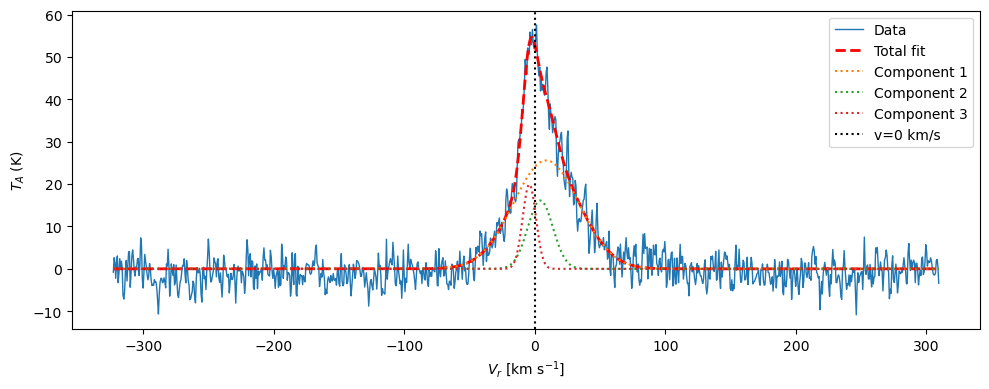

In [4]:
# Triple gaussian fit


# Initial guess: list of [mu, sigma, A] for each component
p0 = [[-20, 10, 10], [0, 30, 40], [10, 10, 20]]
p0 = np.array(p0).flatten()

# Fit
popt, pcov = curve_fit(triple_gauss, V_r, T_src, p0=p0)

# Prepare high-res x
x_fit = np.linspace(V_r.min(), V_r.max(), 2000)

# Compute total and individual components using mu,sigma,A ordering
# component 1
mu1, sigma1, A1 = popt[0], popt[1], popt[2]
y1 = A1 * np.exp(-0.5 * ((x_fit - mu1) / sigma1) ** 2)
# component 2
mu2, sigma2, A2 = popt[3], popt[4], popt[5]
y2 = A2 * np.exp(-0.5 * ((x_fit - mu2) / sigma2) ** 2)
# component 3
mu3, sigma3, A3 = popt[6], popt[7], popt[8]
y3 = A3 * np.exp(-0.5 * ((x_fit - mu3) / sigma3) ** 2)

# total model
y_tot = triple_gauss(x_fit, *popt)

# Extract fitted parameters and uncertainties in mu, sigma, A order
perr = np.sqrt(np.diag(pcov))
for i, (mu, sig, amp, mu_err, sig_err, amp_err) in enumerate(
    zip(popt[0::3], popt[1::3], popt[2::3], perr[0::3], perr[1::3], perr[2::3]), start=1
):
    print(
        f"Component {i}: μ = {mu:.2f} ± {mu_err:.2f}, "
        f"σ = {sig:.2f} ± {sig_err:.2f}, "
        f"A = {amp:.2f} ± {amp_err:.2f}"
    )


plt.figure(figsize=(10, 4))
plt.plot(V_r, T_src, label="Data", lw=1)
plt.plot(x_fit, y_tot, "r--", label="Total fit", lw=2)
plt.plot(x_fit, y1, "C1:", label="Component 1")
plt.plot(x_fit, y2, "C2:", label="Component 2")
plt.plot(x_fit, y3, "C3:", label="Component 3")
plt.axvline(0, color="k", ls=":", label="v=0 km/s")
plt.xlabel("$V_r$ [km s$^{-1}$]")
plt.ylabel(r"$T_A$ (K)")
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()

Component 1: μ = 8.42 ± 0.62, σ = 22.68 ± 0.51, A = 31.08 ± 1.14
Component 2: μ = -1.89 ± 0.31, σ = 6.99 ± 0.41, A = 26.11 ± 1.32


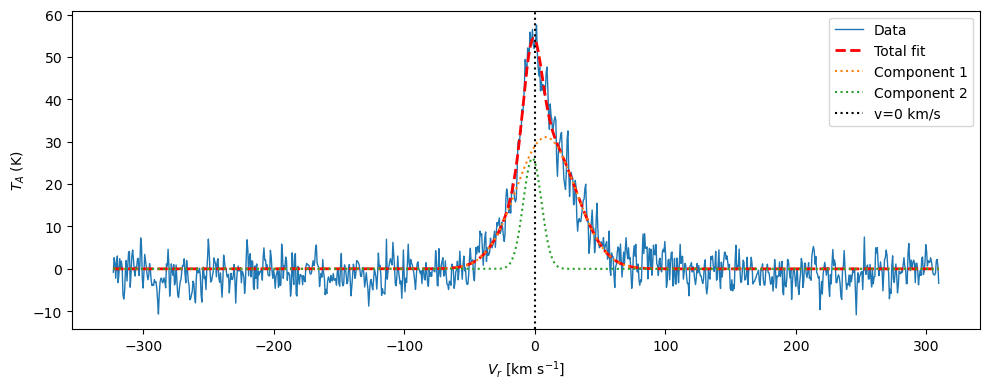

In [10]:
# Initial guess: list of [mu, sigma, A] for each component
p0 = [[0, 30, 40], [10, 10, 20]]
p0 = np.array(p0).flatten()

# Fit
popt, pcov = curve_fit(double_gauss, V_r, T_src, p0=p0)

# Prepare high-res x
x_fit = np.linspace(V_r.min(), V_r.max(), 2000)

# Compute total and individual components using mu,sigma,A ordering
# component 1
mu1, sigma1, A1 = popt[0], popt[1], popt[2]
y1 = A1 * np.exp(-0.5 * ((x_fit - mu1) / sigma1) ** 2)
# component 2
mu2, sigma2, A2 = popt[3], popt[4], popt[5]
y2 = A2 * np.exp(-0.5 * ((x_fit - mu2) / sigma2) ** 2)

# total model
y_tot = double_gauss(x_fit, *popt)

# Extract fitted parameters and uncertainties in mu, sigma, A order
perr = np.sqrt(np.diag(pcov))
for i, (mu, sig, amp, mu_err, sig_err, amp_err) in enumerate(
    zip(popt[0::3], popt[1::3], popt[2::3], perr[0::3], perr[1::3], perr[2::3]), start=1
):
    print(
        f"Component {i}: μ = {mu:.2f} ± {mu_err:.2f}, "
        f"σ = {sig:.2f} ± {sig_err:.2f}, "
        f"A = {amp:.2f} ± {amp_err:.2f}"
    )


plt.figure(figsize=(10, 4))
plt.plot(V_r, T_src, label="Data", lw=1)
plt.plot(x_fit, y_tot, "r--", label="Total fit", lw=2)
plt.plot(x_fit, y1, "C1:", label="Component 1")
plt.plot(x_fit, y2, "C2:", label="Component 2")
plt.axvline(0, color="k", ls=":", label="v=0 km/s")
plt.xlabel("$V_r$ [km s$^{-1}$]")
plt.ylabel(r"$T_A$ (K)")
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()

# Simple Code!

In [2]:
from src.calibration import calibrate, load_calibrated

# To rerun calibration
# V_r, T_src = calibrate(l=14, b=3, plot=False, demo=True)

# Load calibrated data
V_r, T_src = load_calibrated(l=14, b=3)

Component 1: μ = 8.69 ± 0.90, σ = 25.11 ± 1.06, A = 25.58 ± 2.52
Component 2: μ = 4.20 ± 3.73, σ = 9.63 ± 2.09, A = 16.13 ± 5.42
Component 3: μ = -4.23 ± 0.55, σ = 5.11 ± 0.94, A = 19.92 ± 7.18


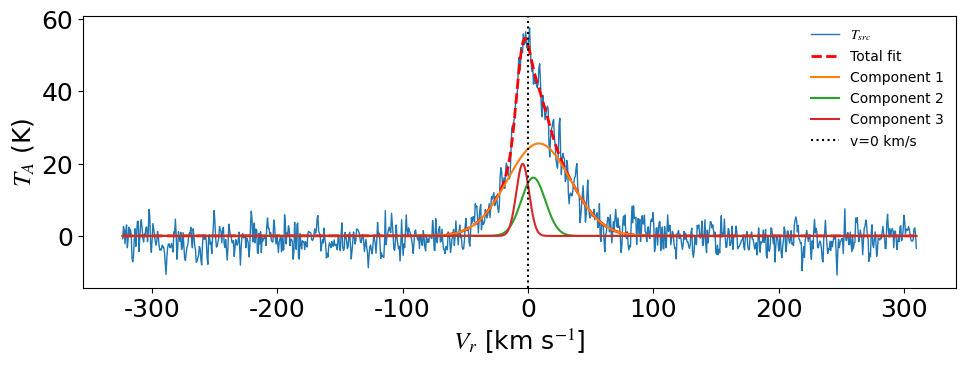

In [3]:
from src.analysis import gaussian_fit


p0 = [[-20, 10, 10], [0, 30, 40], [10, 10, 20]]

fig, ax = gaussian_fit(V_r, T_src, p0)

Component 1: μ = 8.42 ± 0.62, σ = 22.68 ± 0.51, A = 31.08 ± 1.14
Component 2: μ = -1.89 ± 0.31, σ = 6.99 ± 0.41, A = 26.11 ± 1.32


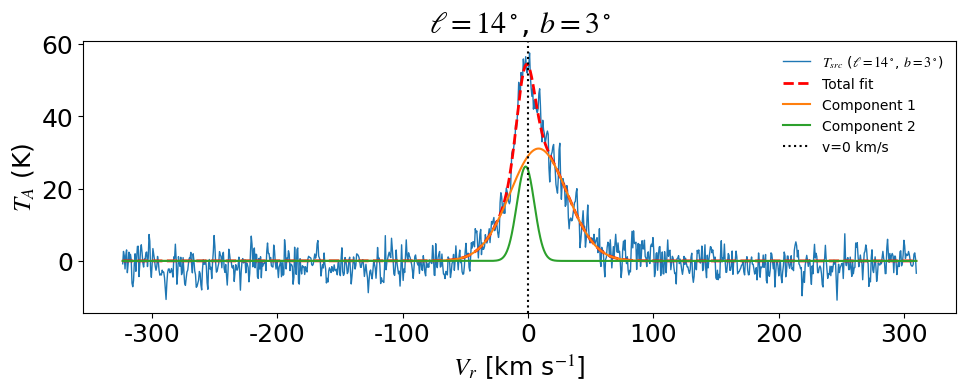

In [ ]:
import matplotlib.pyplot as plt
from src.analysis import gaussian_fit


p0 = [[0, 30, 40], [10, 10, 20]]

fig, ax = gaussian_fit(V_r, T_src, p0)

# for title!
l = 14
b = 3
ax.set_title(rf"$\ell = {l}^\circ$, $b = {b}^\circ$")

plt.show()

Component 1: μ = 3.78 ± 0.28, σ = 18.15 ± 0.28, A = 46.64 ± 0.62


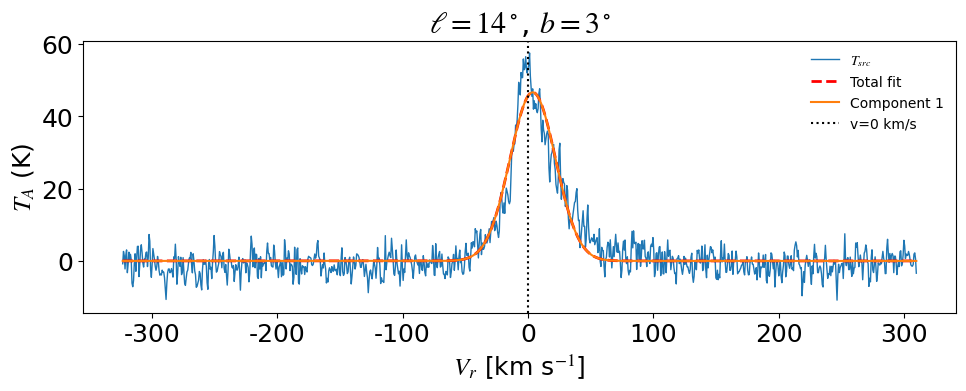

In [ ]:
p0 = [[0, 30, 40]]

fig, ax = gaussian_fit(V_r, T_src, p0)

# for title!
l, b = 14, 3
ax.set_title(rf"$\ell = {l}^\circ$, $b = {b}^\circ$")

plt.show()

# HI Column Density

## Physical Parameter

안테나 온도를 천체의 실제 물리적 세기로 환산하기 위해서 밝기온도(Brightness Temperature)로 환산합니다. <br>
안테나 효율을 정확히 측정하는 것이 어렵기 때문에, 대략 $\eta=0.5$로 가정합니다. <br>
$T_A^* = \eta T_b $

In [ ]:
# Beam efficiency
eta = 0.5

## Column Density Equation
$n_{\rm HI}[cm^{-2}] = 1.823\times 10^{18} \int dv T_b(v) [\rm K kms^{-1}]$

Component 1: μ = 17.05 ± 0.62, σ = 22.68 ± 0.51, A = 31.08 ± 1.14
Component 2: μ = 6.73 ± 0.31, σ = 6.99 ± 0.41, A = 26.11 ± 1.32
Antenna Temperature of peak 34.10+/-1.23 [K]
Velocity 22.68+/-0.51 [km/s]
Velocity dispersion 31.08+/-1.14 [km/s]
n_HI 9.88+/-0.40[/cm^2]
Antenna Temperature of peak 13.46+/-0.62 [K]
Velocity 6.99+/-0.41 [km/s]
Velocity dispersion 26.11+/-1.32 [km/s]
n_HI 4.26+/-0.22[/cm^2]


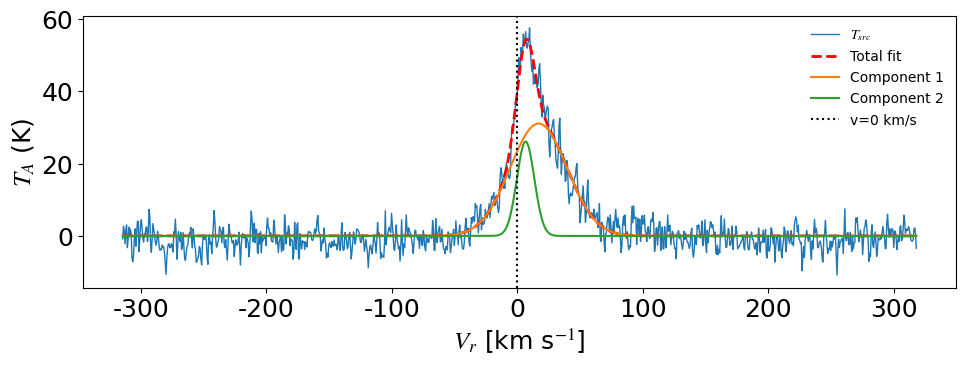

In [ ]:
popt, perr = gaussian_fit(V_r, T_src, p0, return_plot=False)

for i in range(int(len(popt) / 3)):
    print("===================")
    print(f"Antenna Temperature of peak {popt[3*i]/eta:.2f}+/-{perr[3*i]/eta:.2f} [K]")
    print(f"Velocity {popt[3*i+1]:.2f}+/-{perr[3*i+1]:.2f} [km/s]")
    print(f"Velocity dispersion {popt[3*i+2]:.2f}+/-{perr[3*i+2]:.2f} [km/s]")
    nHI, nHIerr = (
        popt[3 * i] * np.sqrt(np.pi / popt[3 * i + 2]) * 1.823,
        np.sqrt(
            np.pi / popt[3 * i + 2] * perr[3 * i] ** 2
            + (popt[3 * i] / 2) ** 2 * np.pi / popt[3 * i + 2] ** 3 * perr[3 * i + 2] ** 2
        )
        * 1.823,
    )
    print(f"n_HI {nHI:.2f}+/-{nHIerr:.2f}[/cm^2]")

# Tangent Point Method

각 조의 데이터를 활용해서 4개의 서로 다른 은하 반지름에서의 회전 속도를 구해 보세요

아래는 위의 데이터로 double gaussian 피팅 예시입니다

loading 40 files
Component 1: μ = 8.42 ± 0.62, σ = 22.68 ± 0.51, A = 31.08 ± 1.14
Component 2: μ = -1.89 ± 0.31, σ = 6.99 ± 0.41, A = 26.11 ± 1.32


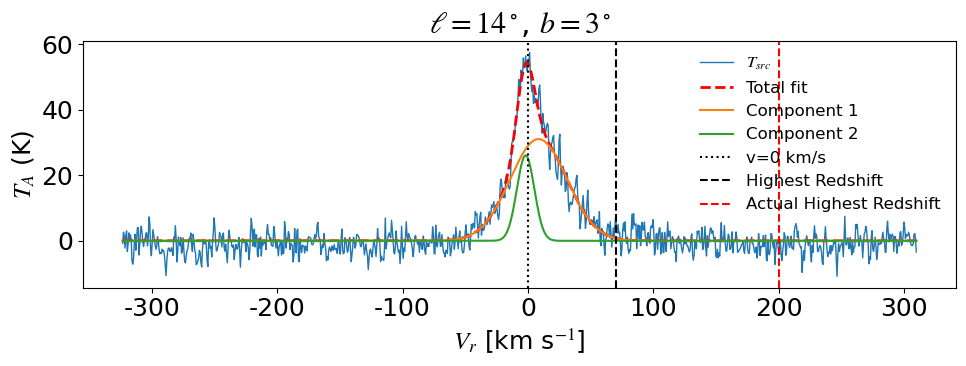

In [32]:
import matplotlib.pyplot as plt
from src.observation import Exposure
from src.analysis import gaussian_fit

V_r, T_src = load_calibrated(l=14, b=3)
sky = Exposure.from_file(l=14, b=3, type="sky", demo=True)  # just for l, b

p0 = [[0, 30, 40], [10, 10, 20]]

fig, ax = gaussian_fit(V_r, T_src, p0, obj=sky)

# Try highest red/blueshift here!
v_highest = 70
ax.axvline(v_highest, c="k", ls="--", label=f"Highest {'Redshift' if sky.l > 0 and sky.l < 90 else 'Blueshift'}")

v_highest = 200
ax.axvline(v_highest, c="r", ls="--", label=f"Actual Highest {'Redshift' if sky.l > 0 and sky.l < 90 else 'Blueshift'}")

ax.set_title(rf"$\ell = {sky.l}^\circ$, $b = {sky.b}^\circ$")
ax.legend(fontsize=12)
plt.show()

In [19]:
import numpy as np

r_sun = 8.5  # kpc

r_gal = r_sun * np.sin(np.deg2rad(l))
r_gal

2.0563361125971755

# Milky Way Rotation Curve

## Bhattacharjee et al. 2014

과학자들이 미리 측정한 값

In [9]:
from astropy.table import Table
from src.constants import DEMO_DATA_DIR

tbl = Table.read(DEMO_DATA_DIR / "rotation_curve.csv")

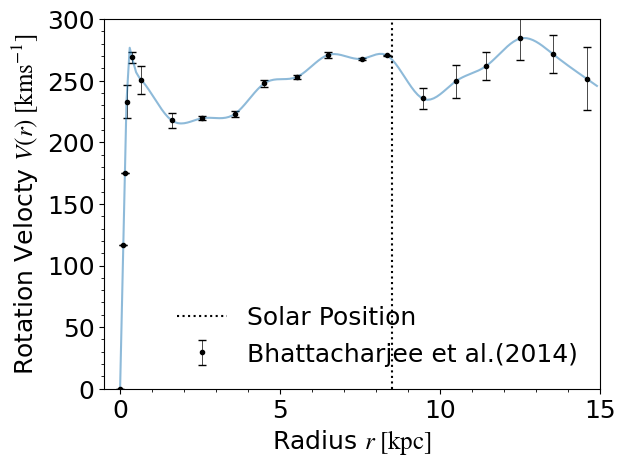

In [ ]:
def plot_archive_rotation_curve():
    from scipy.interpolate import CubicSpline

    plt.errorbar(
        tbl["r"],
        tbl["V"],
        yerr=tbl["dV"],
        color="k",
        label="Bhattacharjee et al.(2014)",
        ls="None",
        capsize=3,
        marker="o",
        ms=3,
        lw=0.5,
    )

    func = CubicSpline(tbl["r"], tbl["V"], bc_type="natural")
    r0 = 8.5
    rs = np.arange(0, 15, 0.1)
    plt.plot(rs, func(rs), alpha=0.5)  # , label="spline curve")

    plt.axvline(r0, color="k", ls="dotted", label="Solar Position")
    plt.minorticks_on()
    plt.ylabel(r"Rotation Velocty $V(r)\;[\rm kms^{-1}]$")
    plt.xlabel(r"Radius $r\;[\rm kpc]$")
    plt.xlim(-0.5, 15)
    plt.ylim(0, 300)
    plt.legend(loc="lower right")


plot_archive_rotation_curve()
plt.show()

## Our Data!

우리가 얻은 데이터를 이 위에 그려 봅시다.

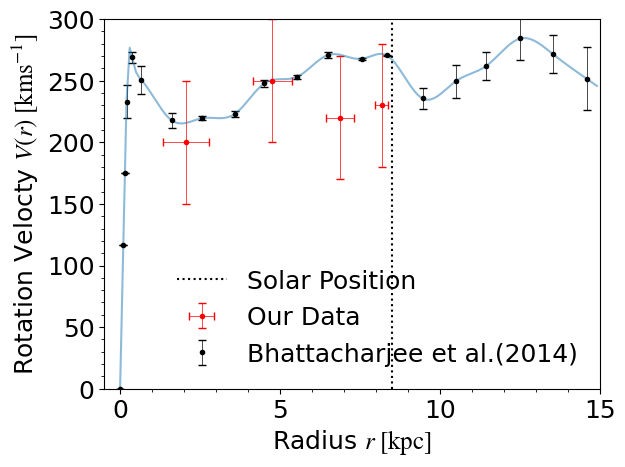

In [53]:
# Fill in below
l = [14, 34, 54, 74]
l_err = [5] * len(l)  # empirical antenna pointing error


V_r = [200, 250, 220, 230]
V_r_err = [50] * len(V_r)  # arbitrary error

r = r_sun * np.sin(np.deg2rad(l))
r_err = r_sun * np.cos(np.deg2rad(l)) * np.deg2rad(l_err)

plt.errorbar(
    r,
    V_r,
    xerr=r_err,
    yerr=V_r_err,
    color="r",
    label="Our Data",
    ls="None",
    capsize=3,
    marker="o",
    ms=3,
    lw=0.5,
)

plot_archive_rotation_curve()